# The Perceptron

### Introduction
In this exercise we are going to take a look at the perceptron. Throughout this exercise we learn how the perceptron handles data, and the problems with the perceptron, and how to overcome them. At last we compare the perceptron to another classifer and see how they match.

### Qa Using a Perceptron on the Moon-data

Load the moon data, split it into a train-and-test set, and train a `sklearn.linear_model.Perceptron` with default parameters (and with no cross-val this time).

What is the default score metric for the perceptron and what score do reach on the test data? 

In [22]:
# TODO: Qa..

from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

from libitmal import dataloaders_v3 as itmaldataloaders

X, y = itmaldataloaders.MOON_GetDataSet(n_samples=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

"TODO: add perceptron hyperparams, train it and get the default score metric on the test data"
model = Perceptron(random_state=42)
model.fit(X_train, y_train)

print("Perceptron Score: ", model.score(X_test, y_test))

Perceptron Score:  0.83


### Qb: Plot the Decision Boundary

Use the helper code below to plot the decision boundary for the perceptron on the moon-data.

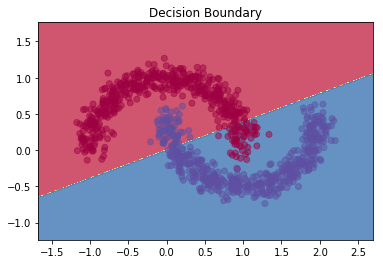

In [8]:
# TODO: Qb..helper code for plotting decision boundaries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral,alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, alpha=.5)

# Predict and plot decision boundary
"insert you perceptron 'model' here...and uncomment this line.."
plot_decision_boundary(lambda x: model.predict(x))
plt.title("Decision Boundary")
plt.show()

### Qc The Perceptron on an XOR-problem

How does the moon data relate to the well-known _XOR_-problem in machine learning?

Is it possible for a single neuron or perceptron to solve the moon/XOR problem satisfactorily?

Elaborate on the reason why not, and give a comment on how to overcome the XOR-problematic using more perceptrons. 

**Answer: It is not possible for a single neuron or perceptron to solve the XOR problem. This is because the XOR-problem cannot be classified with a single classification line. The single perceptron is only capable of seperating data points with a single line. A solution to this problem is using multi-layered perceptrons. By adding an extra layer of perceptrons an extra classification line can be drawn and therefore the XOR-problem can be solved.**

### Qd Compare the Perceptron to the SGD

The Perceptron is said to be similar to the Stochastic Gradient Descent classifier.

Try out the SGD, with a parameter setup compatible with the perceptron, see the _notes_  section

> _`Perceptron` is a classification algorithm which shares the same underlying implementation with `SGDClassifier`. In fact, `Perceptron()` is equivalent to_ <br><br>
`SGDClassifier(loss='perceptron', eta0=1, learning_rate='constant', penalty=None)` <br><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

On the same train-test data train an SGD with perceptron compatible parameters. Give both models a `random_seed=42` and `tol=1e-3` parameters. 

Are the SGD and Perceptron score metrics also compatible?

Does the SGD yield the same score as the Perceptron? 

(100% similar scores, nearly similar or not at all similar?)

In [19]:
# TODO: Qd..
from sklearn.linear_model import Perceptron, SGDClassifier

per_clf = Perceptron(random_state=42, tol=1e-3)
sgd_clf = SGDClassifier(random_state=42, loss='perceptron', eta0=1, learning_rate='constant', penalty=None, tol=1e-3)

per_clf.fit(X_train, y_train)
sgd_clf.fit(X_train, y_train)

print("Perceptron score: ", per_clf.score(X_test, y_test))
print("SGDClassifier score: ", sgd_clf.score(X_test, y_test))

Perceptron score:  0.7933333333333333
SGDClassifier score:  0.7933333333333333


**From the code above, it looks like the scoring is 100% the same for both classifiers. From documentation it also looks like the scoring methods are similar.**

### Conclusion
In this exercise we explored what an perceptron is. Firstly we explored what a single perceptron could do and how i classified data. By this we saw which downsides there were by only using a single perceptron. Fortunately there were ways to work around these downside by adding extra perceptrons. By doing this more complex classifications could be made. Alas we found out how the SGD Classifier matched up against the perceptron and found out they were similar if the SGD Classifier has the right parameters added to it.